# Relate Answers and Clicks

Correlate accuracy in masked faces (upper/lower) with click numbers in full face

Do the clicks into different halves predict how well a person will do when shown only that half?

### import packages

In [1]:
import pickle
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.ticker import PercentFormatter
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

### settings

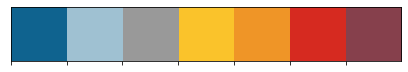

In [2]:
with open('../references/my_settings.json', 'r') as fp:
    settings_dict = json.load(fp)

my_order = settings_dict['my_order']
my_boot = settings_dict['boots']
my_ci = settings_dict['ci']

with open('../models/average_im_dict.pkl', 'rb') as fp:
    avg_im_dict = pickle.load(fp)
    
with open('../models/palette7.pkl','rb') as fp:
    palette7 = pickle.load(fp)

sns.palplot(palette7)

In [3]:
ax.text?

Object `ax.text` not found.


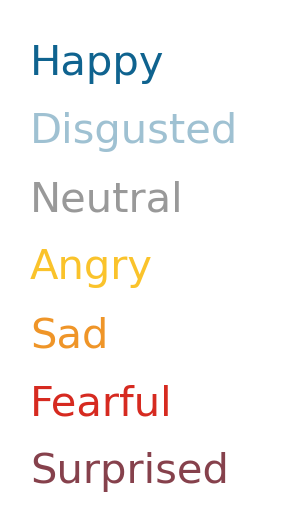

In [4]:
fig, ax = plt.subplots(1,1,figsize=(1,2), dpi=300)
for n, i in enumerate(my_order[::-1]):
    ax.text(x=0, y=n*0.15, s=i, color=palette7[::-1][n], fontfamily='sans')

sns.despine(bottom=True, left=True)
ax.set_xticks([]); ax.set_yticks([])

plt.savefig('../reports/figures/emo_colors.png', dpi=300)
plt.show()

### load data

#### for answers

In [5]:
ans_diff_df = pd.read_csv('../data/processed/ans_diff_correct_df.tsv', sep='\t', index_col=[0])
ans_diff_df.tail()

Angry  Disgusted  Fearful  Happy  Neutral  Sad  Surprised
p228    0.3       -0.4      0.4   -0.2     -0.2  0.1       -0.1
p230    0.2       -0.4      0.2   -0.1     -0.1  0.1        0.2
p231    0.6       -0.8     -0.5   -0.1     -0.1 -0.4        0.2
p232    0.2       -0.6      0.3   -0.1     -0.4  0.0        0.0
p233    0.9       -0.3      0.3   -0.1      0.1  0.4        0.0

#### for clicks

In [6]:
click_diff_df = pd.read_csv('../data/processed/click_diff_correct_df.tsv', sep='\t', index_col=[0])
click_diff_df.tail()

Angry  Disgusted   Fearful  Happy   Neutral       Sad  Surprised
p228  0.320000   0.060000  0.250000  -0.21  0.100000  0.133333   0.155556
p230  0.077778   0.044444  0.100000   0.02  0.062500  0.122222   0.155556
p231  0.160000   0.037500  0.088889   0.03  0.042857 -0.016667   0.110000
p232  0.122222   0.033333  0.125000  -0.19  0.077778  0.066667   0.110000
p233  0.340000   0.188889  0.100000  -0.01  0.083333  0.137500   0.077778

### summary statistics

In [7]:
ans_mean = ans_diff_df.mean()
click_mean = click_diff_df.mean()

mean_df = pd.concat([ans_mean, click_mean], axis=1)
mean_df.columns = pd.MultiIndex.from_tuples([('mean', 'ans'), ('mean', 'click')])

#### five-sigma confidence interval

In [8]:
def make_ci(df, settings_dict=settings_dict):
    
    std_series = df.std()
    n = df.shape[0]
    se_series = std_series/np.sqrt(n)
    ci_series = se_series * settings_dict['sigma']
    
    return ci_series

In [9]:
ans_ci = make_ci(ans_diff_df)
click_ci = make_ci(click_diff_df)

ci_df = pd.concat([ans_ci, click_ci], axis=1)
ci_df.columns = pd.MultiIndex.from_tuples([('ci', 'ans'), ('ci', 'click')])

#### table with all the stats

In [10]:
stats_df = pd.concat([mean_df, ci_df], axis=1).sort_index(axis=1)
stats_df

ci                mean          
                ans     click       ans     click
Angry      0.074442  0.037059  0.354950  0.101609
Disgusted  0.084726  0.036152 -0.421287  0.003841
Fearful    0.093598  0.038478  0.233168  0.144847
Happy      0.039748  0.042963 -0.176238 -0.068075
Neutral    0.057274  0.038383  0.003465  0.048798
Sad        0.081656  0.034665  0.002475  0.104608
Surprised  0.059913  0.041738  0.030693  0.181853

### Plot

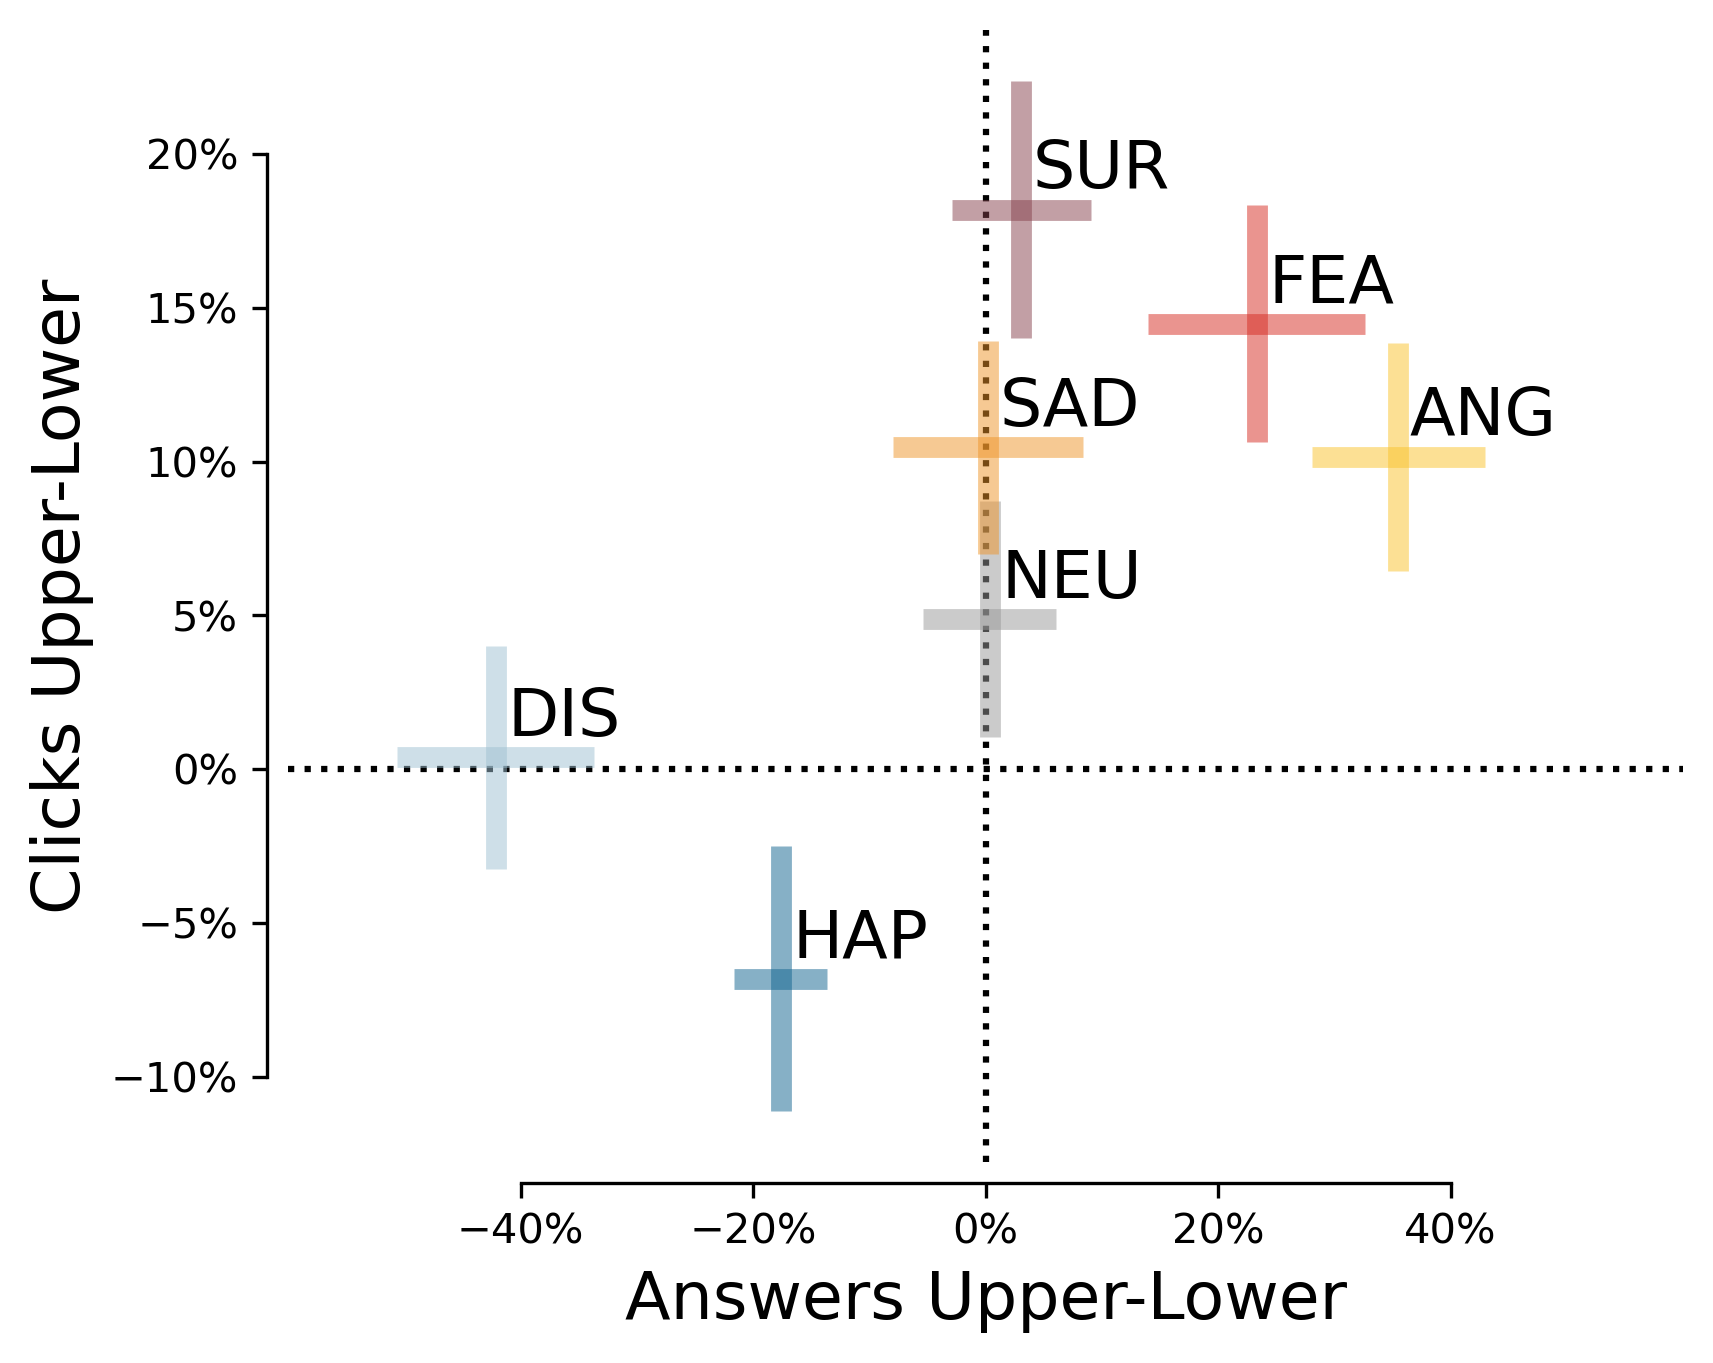

In [11]:
fig, ax = plt.subplots(1,1, figsize=(6, 5), dpi=300)

for n, i in enumerate(my_order):
    
    mean_df = stats_df.loc[:, 'mean']
    ci_df = stats_df.loc[:, 'ci']
    
    x = mean_df.loc[i, 'ans']
    y = mean_df.loc[i, 'click']

    x_ci = ci_df.loc[i, 'ans']
    y_ci = ci_df.loc[i, 'click']
    
    color = palette7[n]
    
    plt.errorbar(x,y,
                 xerr=x_ci,
                 yerr=y_ci,
                 
                 mfc=color,
                 ecolor=color,
                 elinewidth=5,
                 
                 markersize=0,#15,
                 marker='o',
                 markeredgewidth=0,
                 fmt=' ',
                 #zorder=99,
                 
                 alpha=0.5,
                )
    
    # name of emotion
    str_len = len(i)
    plt.annotate(xy=(x+0.01, y+0.007), text=i.upper()[:3], fontsize=16, color='k', zorder=99)

plt.axhline(0, color='k', linestyle=':', zorder=0)
plt.axvline(0, color='k', linestyle=':', zorder=0)

plt.xlabel('Answers Upper-Lower', fontsize=16)
plt.ylabel('Clicks Upper-Lower', fontsize=16)

plt.xlim(-.6, .6, .2)

plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))

sns.despine(trim=True, offset=5)

plt.savefig('../reports/figures/compare_fig.png', bbox_inches='tight', dpi=300)
plt.show()

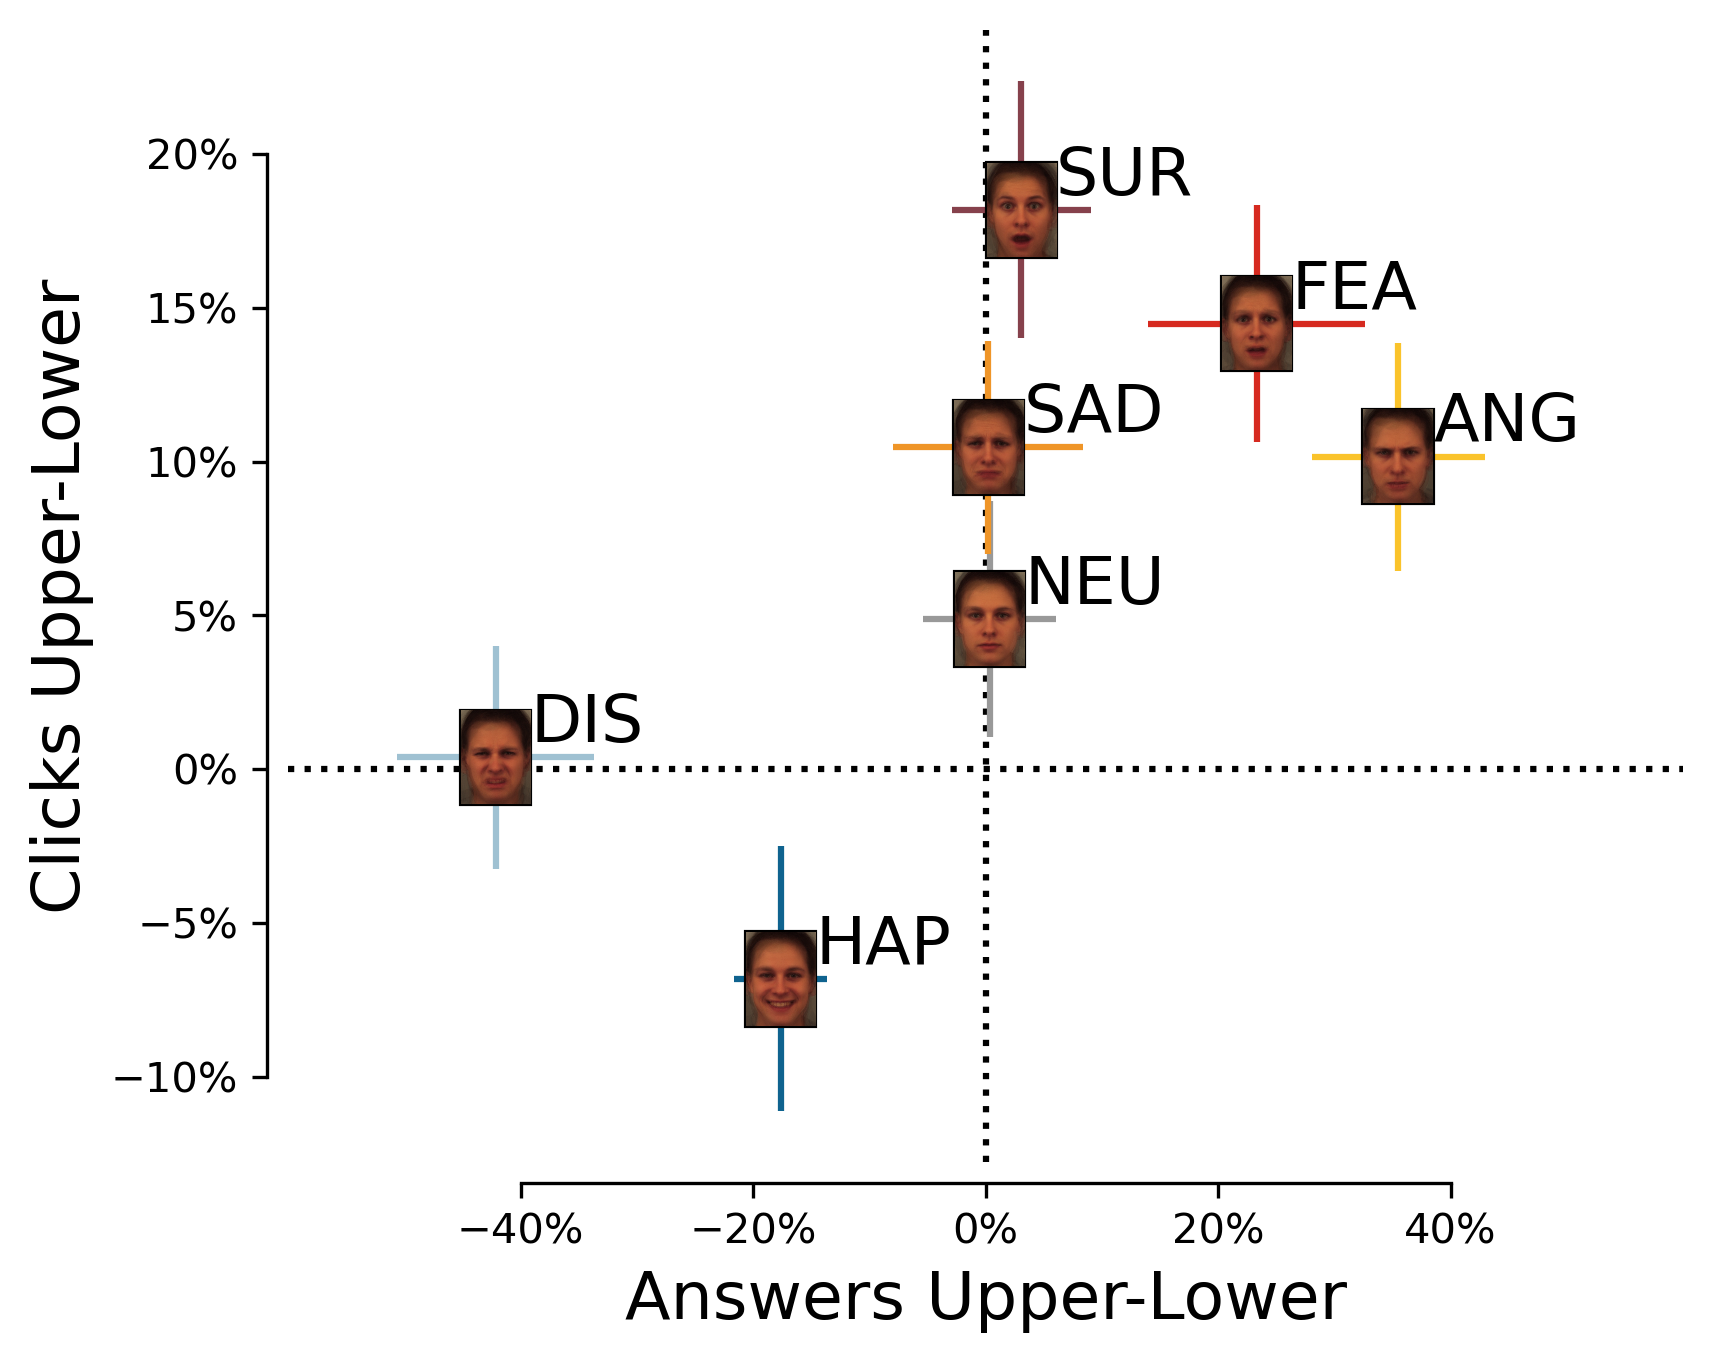

In [12]:
fig, ax = plt.subplots(1,1, figsize=(6, 5), dpi=300)

for n, i in enumerate(my_order):
    
    mean_df = stats_df.loc[:, 'mean']
    ci_df = stats_df.loc[:, 'ci']
    
    x = mean_df.loc[i, 'ans']
    y = mean_df.loc[i, 'click']

    x_ci = ci_df.loc[i, 'ans']
    y_ci = ci_df.loc[i, 'click']
    
    color = palette7[n]
    
    plt.errorbar(x,y,
                 xerr=x_ci,
                 yerr=y_ci,
                 
                 mfc=color,
                 ecolor=color,
                 
                 marker='s',
                 markeredgewidth=0,
                 fmt=' ',
                 #zorder=99,
                )
    
    # name of emotion
    str_len = len(i)
    plt.annotate(xy=(x+0.03, y+0.005), text=i.upper()[:3], fontsize=16, color='k', zorder=99)

    # image of emotion
    im = avg_im_dict[i]
    imagebox = OffsetImage(np.asarray(im), zoom=.045)
    ab = AnnotationBbox(imagebox, (x, y), pad=0)
    ax.add_artist(ab)

plt.axhline(0, color='k', linestyle=':', zorder=0)
plt.axvline(0, color='k', linestyle=':', zorder=0)

plt.xlabel('Answers Upper-Lower', fontsize=16)
plt.ylabel('Clicks Upper-Lower', fontsize=16)

plt.xlim(-.6, .6, .2)

plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))

sns.despine(trim=True, offset=5)

plt.savefig('../reports/figures/compare_fig2.png', bbox_inches='tight', dpi=300)
plt.show()

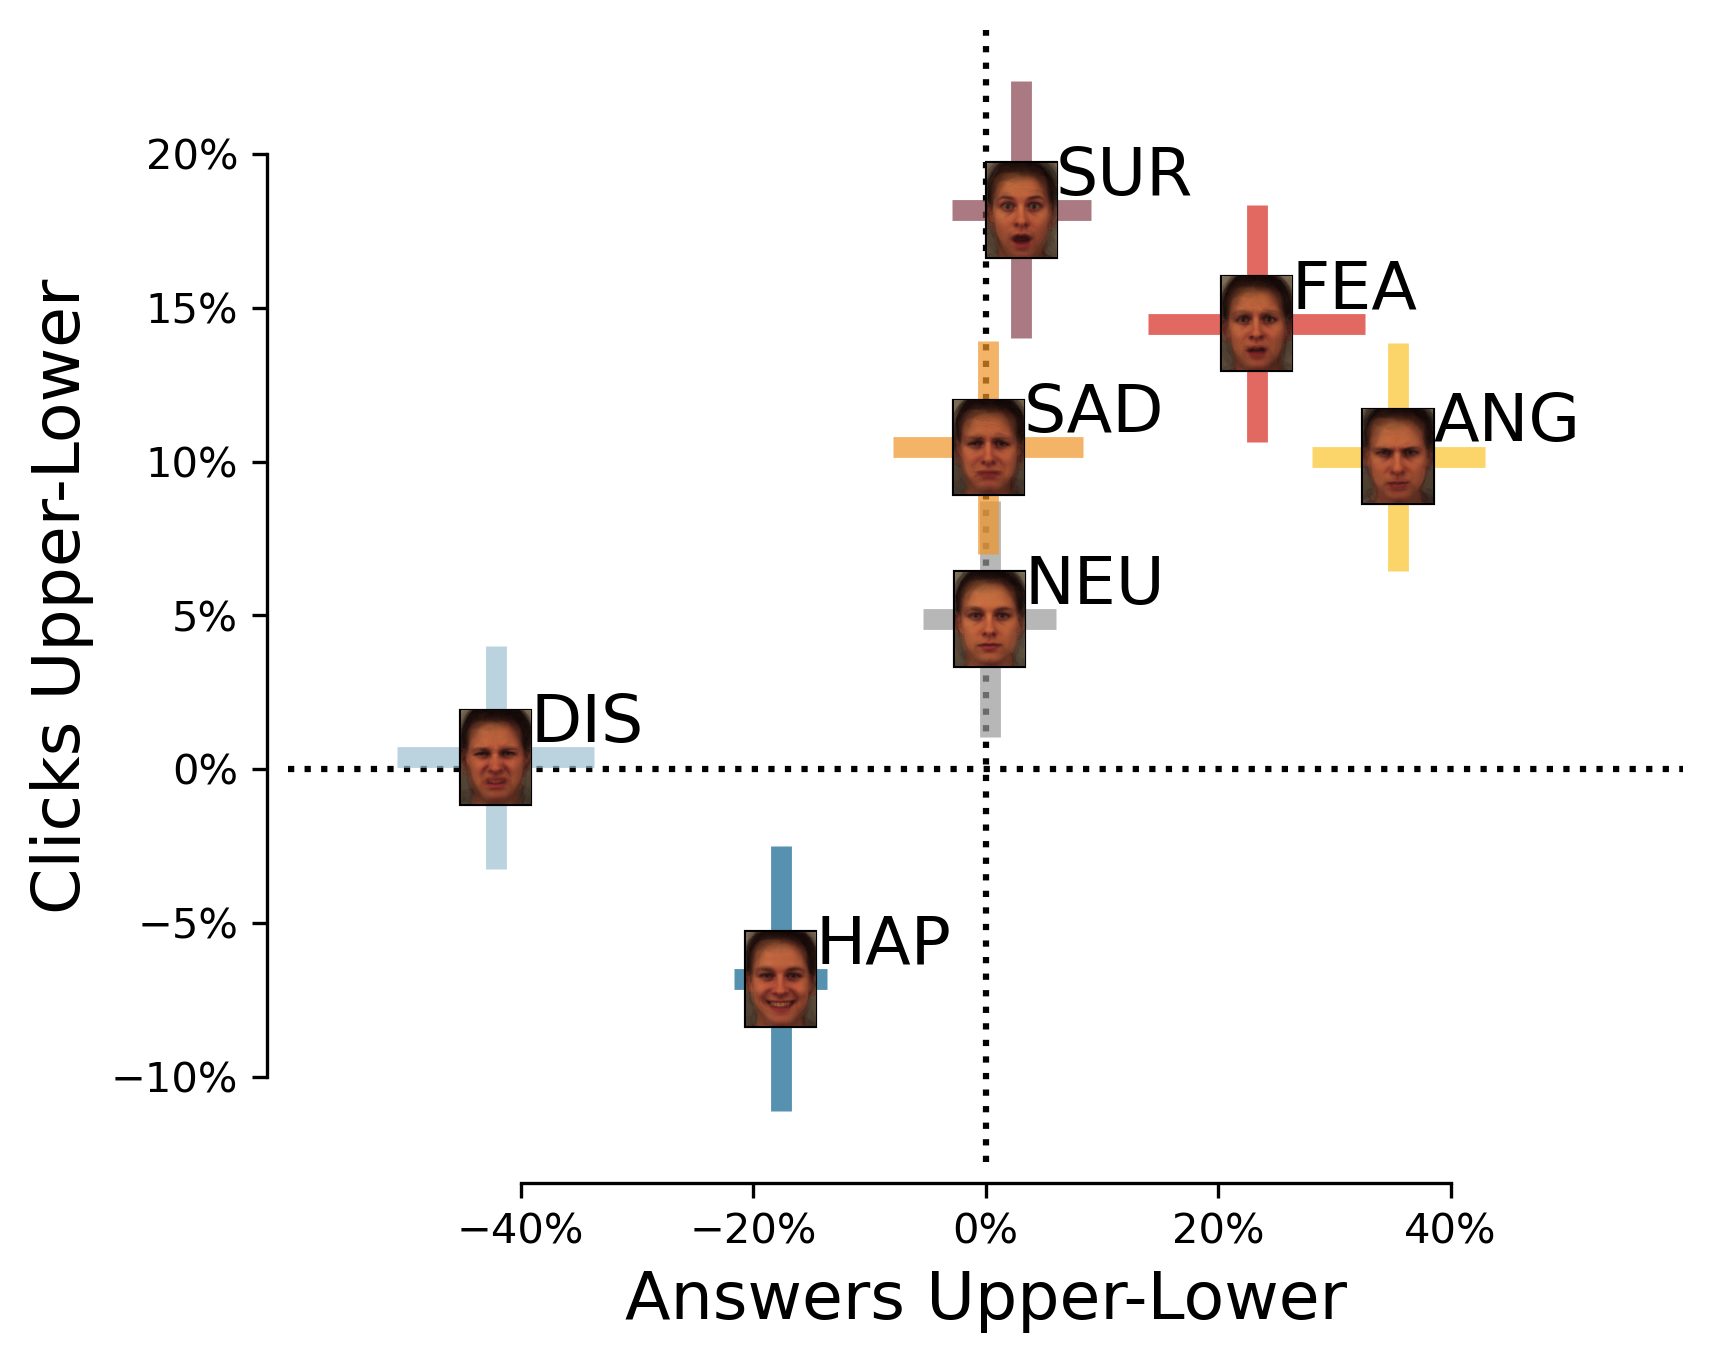

In [13]:
fig, ax = plt.subplots(1,1, figsize=(6, 5), dpi=300)

for n, i in enumerate(my_order):
    
    mean_df = stats_df.loc[:, 'mean']
    ci_df = stats_df.loc[:, 'ci']
    
    x = mean_df.loc[i, 'ans']
    y = mean_df.loc[i, 'click']

    x_ci = ci_df.loc[i, 'ans']
    y_ci = ci_df.loc[i, 'click']
    
    color = palette7[n]
    
    plt.errorbar(x,y,
                 xerr=x_ci,
                 yerr=y_ci,
                 
                 mfc=color,
                 ecolor=color,
                 elinewidth=5,
                 markersize=0,#15,
                 
                 marker='o',
                 markeredgewidth=0,
                 fmt=' ',
                 alpha=0.7,
                 #zorder=99,
                )                 

    # name of emotion
    str_len = len(i)
    plt.annotate(xy=(x+0.03, y+0.005), text=i.upper()[:3], fontsize=16, color='k', zorder=99)

    # image of emotion
    im = avg_im_dict[i]
    imagebox = OffsetImage(np.asarray(im), zoom=.045)
    ab = AnnotationBbox(imagebox, (x, y), pad=0)
    ax.add_artist(ab)

plt.axhline(0, color='k', linestyle=':', zorder=0)
plt.axvline(0, color='k', linestyle=':', zorder=0)

plt.xlabel('Answers Upper-Lower', fontsize=16)
plt.ylabel('Clicks Upper-Lower', fontsize=16)

plt.xlim(-.6, .6, .2)

plt.gca().xaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))
plt.gca().yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))

sns.despine(trim=True, offset=5)

plt.savefig('../reports/figures/compare_fig3.png', bbox_inches='tight', dpi=300)
plt.show()